<a href="https://colab.research.google.com/github/edco29/MLBankMarketing/blob/master/Bank_Marketing_Merge1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Bank Marketing DataSet 

## ***Variable binaria de salida (objetivo deseado)***:
  **17 - y** - ¿el cliente subscribirá un depósito a plazo? (binario: "yes", "no")
   
## ***16 Variables* de entrada:**
## Datos del cliente bancario:
   **1 - age**: edad: (numérica)
   
   **2 - job**: trabajo: tipo de trabajo (*categórico*)
   
      (: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", 
				"student", "blue-collar", "self-employed", "retired", "technician", "services") 
      (: "admin.", "desconocido", "desempleado", "dirección", "criada", "empresario", 
				"estudiante", "obrero", "autónomo", "jubilado", "técnico", "servicios") 

   **3 - marital**: marital: estado civil, (*categórico*)
   
      (: "casado", "divorciado", "soltero";  **nota**: "divorciado" significa divorciado o viudo)

   **4 - education**: educación: (*categórica*: "desconocida", "secundaria", "primaria", "terciaria")

   **5 - default**: incumplimiento: ¿tiene el crédito en mora? (binario: "sí", "no")

   **6 - balance**: saldo: saldo medio anual, en euros (numérico) 

   **7 - housing**: vivienda: ¿tiene préstamo de vivienda? (binario: "sí", "no")

   **8 - loan**: préstamo: ¿tiene préstamo personal? (binario: "sí", "no")

## Relacionados con el último contacto de la actual campaña:
   **9 - contact**: contacto: tipo de comunicación del contacto (categórico: "desconocido", "teléfono", "celular") 

  **10 - day**: día: último día de contacto del mes (numérico)

  **11 - month**: mes: último mes de contacto del año (*categórico*: "jan", "feb", "mar", ..., "nov", "dec")

  **12 - duration**: duración: duración del último contacto, en segundos (numérico)

## Otros atributos:
  **13 - campaign**: campaña: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)

  **14 - pdays**: número de días que pasaron después de que el cliente fue contactado por última vez de una campaña anterior (numérico, -1 significa que el cliente no fue contactado previamente)

  **15 - previous**: anterior: número de contactos realizados antes de esta campaña y para este cliente (numérico)

  **16 - poutcome**: resultado de la anterior campaña de comercialización (categórico: "desconocido", "otro", "fracaso", "éxito")


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model, svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# sns.set(style="white")
# sns.set(style="whitegrid", color_codes=True)

# **DATASET**

---



In [0]:
#data =pd.read_csv('bank.csv', delimiter=";")
data =pd.read_csv('bank-full.csv', delimiter=";")

In [0]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [0]:
data.shape

(45211, 17)

# **EXPLORACIÓN DE DATOS**

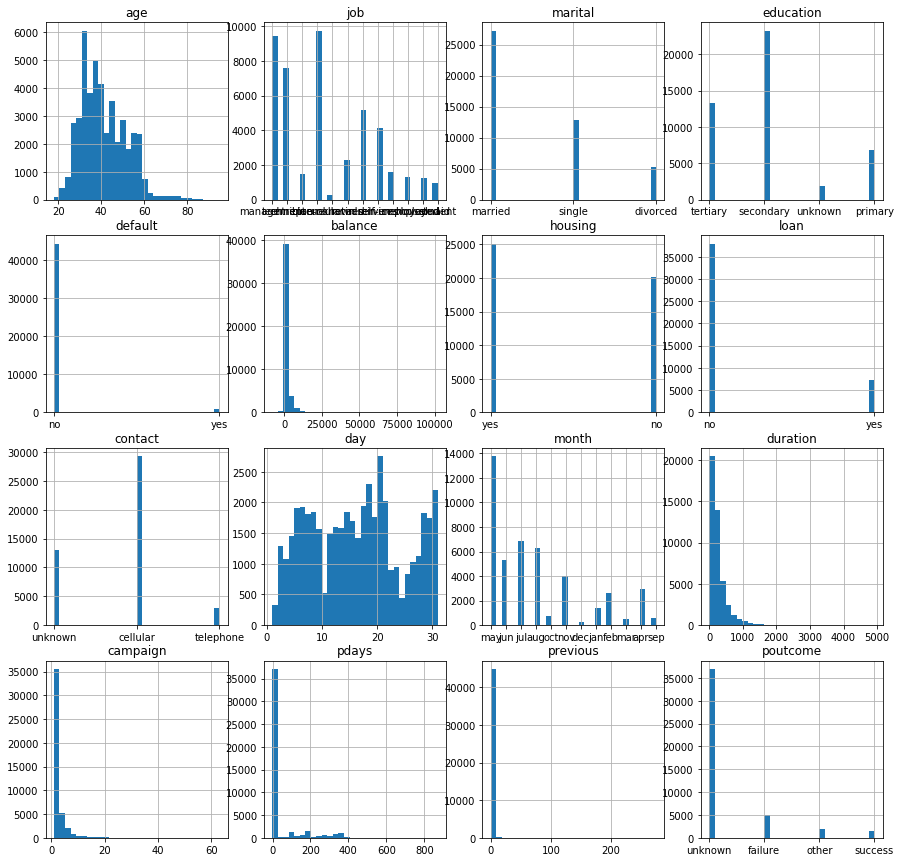

In [0]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15,15))
for idx, colname in enumerate(data.columns):
  if colname != 'y':
    plt.subplot(4,4,idx+1)
    plt.title(colname)
    data[colname].hist(bins=30)

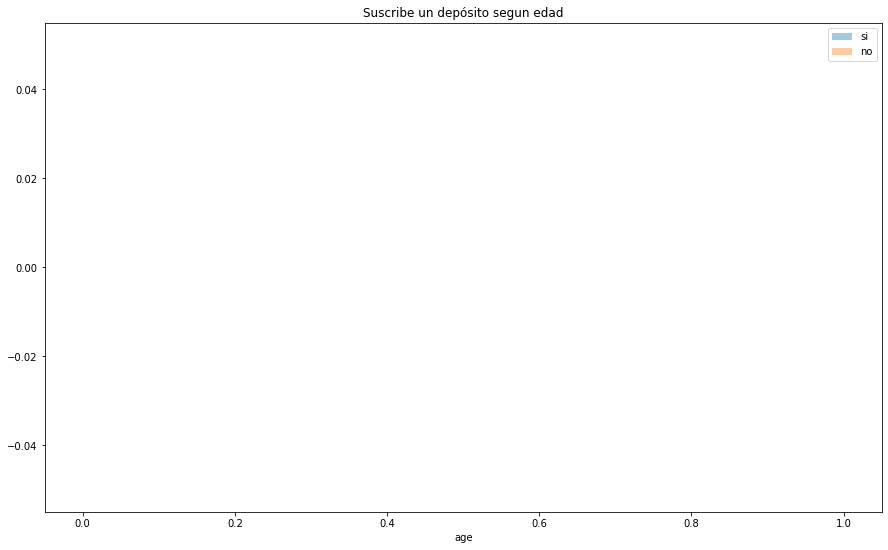

In [0]:
suscribe = 'si'
nosuscribe= 'no'
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(15, 9))
ax = sns.distplot(data[data['y']=='yes'].age, bins=40, label = suscribe, ax = axes, kde =False)
ax = sns.distplot(data[data['y']=='no'].age, bins=40, label = nosuscribe, ax = axes, kde =False)
ax.legend()
_=ax.set_title('Suscribe un depósito segun edad')

In [0]:
#suscribe separado por estado civil

numbins=40
suscribe = 'si'
nosuscribe= 'no'
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(15, 12),sharex=True , sharey=True)
soltero = data[data['marital']=='single']
casado = data[data['marital']=='married']
divorx = data[data['marital']=='divorced']
ax = sns.distplot(soltero[soltero['y']=='yes'].age, bins=numbins, label = suscribe, ax = axes[0], kde =False)
ax = sns.distplot(soltero[soltero['y']=='no'].age, bins=numbins, label = nosuscribe, ax = axes[0], kde =False)
ax.legend()
_=ax.set_title('Suscribe según edad (solteros)')
ax = sns.distplot(casado[casado['y']=='yes'].age, bins=numbins, label = suscribe, ax = axes[1], kde =False)
ax = sns.distplot(casado[casado['y']=='no'].age, bins=numbins, label = nosuscribe, ax = axes[1], kde =False)
ax.legend()
_=ax.set_title('Suscribe según edad (casado)')
ax = sns.distplot(divorx[divorx['y']=='yes'].age, bins=numbins, label = suscribe, ax = axes[2], kde =False)
ax = sns.distplot(divorx[divorx['y']=='no'].age, bins=numbins, label = nosuscribe, ax = axes[2], kde =False)
ax.legend()
_=ax.set_title('Suscribe según edad (divorciado o viudo)')

In [0]:
sns.pairplot(data, vars=['age','balance','duration'], markers='+', hue="y")

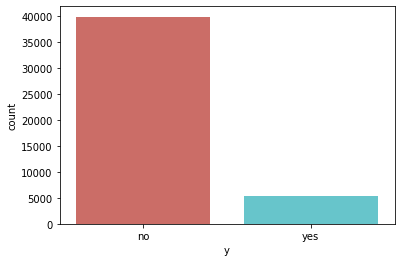

<Figure size 432x288 with 0 Axes>

In [0]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [0]:
data.isnull().sum().sort_values(ascending=False)

y            0
loan         0
job          0
marital      0
education    0
default      0
balance      0
housing      0
contact      0
poutcome     0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
age          0
dtype: int64

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# **CREACIÓN DE VARIABLES**

In [0]:
data["y"]= data["y"].map( {'yes': 1, 'no': 0} ).astype(int)

In [0]:
var_categoricas=['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in var_categoricas:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data_at = data.join(cat_list)
    data = data_at

In [0]:
data.shape

(45211, 61)

In [5]:
columnas_total = data.columns.values.tolist()
columnas_usar = [col for col in columnas_total if col not in var_categoricas]
print(columnas_usar)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [6]:
data_usar = data[columnas_usar]
data_usar.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [0]:
data_usar.shape

(45211, 52)

In [0]:
y=['y']
x=[i for i in columnas_usar if i not in y]

x=data_usar[x]
y=data_usar[y]

# **OVER SAMPLING**

In [0]:
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X, os_data_y= os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y=pd.DataFrame(data=os_data_y, columns=['y'])

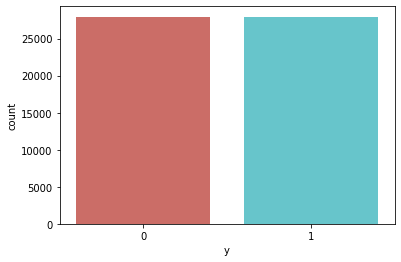

In [9]:
sns.countplot(x='y', data=os_data_y, palette='hls')
plt.show()

# **REGRESORES DE IMPORTANCIA**

In [0]:
from sklearn.feature_selection import RFE

logreg = LogisticRegression(solver='lbfgs')

In [11]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True  True False False False False False False
 False False False False False False False False False False False False
 False False False]
[26 32 27 30 24 31 28  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1
  1  1 23 29  1  1  7  6  5  4  3 17 12 19 15 11 14 18 22 16 13 20 21  9
 10 25  8]


In [12]:
col_validas = rfe.support_
col_validas = list(col_validas)
cols = list(columnas_usar)
print(cols,col_validas)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown'] [False, False, False, False, False, False, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, False, F

In [13]:
from itertools import compress

final_colum = list(compress(cols, col_validas))
final_colum

['y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'default_yes',
 'housing_no']

In [14]:
final_colum = [i for i in final_colum if i not in 'y']
x=os_data_X[final_colum]
y=os_data_y

# agregar columnas importantes para mejorar los resultados
x['duration'] = os_data_X.duration
x['previous'] = os_data_X.previous
x['pdays'] = os_data_X.pdays
x

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_yes,housing_no,duration,previous,pdays
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,205,0,-1
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,168,0,-1
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,216,0,-1
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,63,0,-1
4,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,512,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,649,0,-1
55902,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,367,1,522
55903,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1169,1,33
55904,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,783,0,-1


# **VISUALIZACIÓN DE DATOS RELACIONADOS**

In [0]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Gráfico de barras apiladas de estado civil vs compra')
plt.xlabel('Estado civil')
plt.ylabel('Proporción de clientes')
plt.savefig('mariral_vs_pur_stack')

In [0]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Frecuencia de compra para el cargo')
plt.xlabel('Trabajo')
plt.ylabel('Frecuencia de compra')
plt.savefig('purchase_fre_job')

In [0]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Frecuencia de compra por mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia de compra')
plt.savefig('pur_fre_month_bar')

In [0]:
pd.crosstab(data.duration,data.y).plot(kind='bar')
plt.title('Frecuencia de compra por mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia de compra')
plt.savefig('pur_fre_month_bar')

In [0]:
pd.crosstab(data.pdays,data.y).plot(kind='bar')
plt.title('Frecuencia de compra por mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia de compra')
plt.savefig('pur_fre_month_bar')

# Confusion Matrix

In [0]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,6), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
        
    Reference
    -------
    https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
    
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Predicción')
    print(fig)

# **TRAIN TEST SPLIT**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [0]:
y_train.y.value_counts()

In [0]:
type(y_train.y)

## Escalar la data

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

# 1.MODELO DE REGRESIÓN LOGÍSTICA

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [0]:
y_pred = logreg.predict(X_test)

In [0]:
print('Precisión del clasificador de regresión logística en el conjunto de prueba: {:.3f}'.format(logreg.score(X_test, y_test)))

# 2.IMPLEMENTACIÓN DEL MODELO DE RANDOM FOREST

In [0]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test)*100, 3)

In [16]:
print('Precisión del clasificador de regresión logística en el conjunto de prueba: {:.3f}'.format(acc_random_forest))

Precisión del clasificador de regresión logística en el conjunto de prueba: 90.445


# 3.IMPLEMENTACIÓN DEL MODELO DE STOCHASTIC GRADIENT DECENT

In [0]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_test, y_test) * 100, 3)

In [0]:
print('Precisión del clasificador de regresión logística en el conjunto de prueba: {:.3f}'.format(acc_sgd))

Precisión del clasificador de regresión logística en el conjunto de prueba: 89.067


# 7. Clasificador KNearestNeighbors (K-NN)

In [0]:
n_neighbors = 4
 
knn = KNeighborsClassifier(n_neighbors)
knn

In [0]:
knn.fit(X_train, y_train)
print('Precision de KNearestNeighbors en el training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Precision de KNearestNeighbors en el test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

In [0]:
knn.fit(X_train_scaled, y_train)
print('Precision de KNearestNeighbors en el training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Precision de KNearestNeighbors en el test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

In [0]:
print_confusion_matrix( confusion_matrix=confusion_matrix(y_test,y_pred), class_names=['No','Si'])

# 8. Clasificador de Vectores de Soporte
### (SupportVector-Classifier)

In [0]:
Cs = np.logspace(-2,2,4)  # ~ [0.01, 0.03, 0.1, ..., 100]
gammas = np.logspace(-4,4,4)  # [0.0001, 0.001, ..., 10000]

#Cs = [200  ]   #
#gammas = [50 ] #

mejor_modelo = None
mejor_score = 0
for C in Cs:
    for gamma in gammas:
        
        model = SVC(kernel='rbf', C=C, gamma=gamma) 
        model.fit(X_train_scaled, y_train)
        
        score_val = model.score(X_test_scaled, y_test) 
        print ('C: %0.4f , gamma: %0.4f' % (C,gamma))
        print ('Exactitud en el conjunto de validación: %0.4f' % score_val)
        
        if score_val > mejor_score:
            mejor_score = score_val
            mejor_modelo = model


print ('Mejor valor de C: %0.4f' % mejor_modelo.get_params()['C'])
print ('Mejor valor de gamma: %0.4f' % mejor_modelo.get_params()['gamma'])
print ('Exactitud en el conjunto de entrenamiento: %0.4f' % mejor_modelo.score(X_train_scaled, y_train))
print ('Exactitud en el conjunto de validación: %0.4f' % mejor_modelo.score(X_test_scaled, y_test))

In [0]:
y_pred = mejor_modelo.predict(X_test_scaled)

print(classification_report(y_test, y_pred))



In [0]:
print_confusion_matrix( confusion_matrix=confusion_matrix(y_test,y_pred), class_names=['No','Si'])

# 9. Clasificador bayesiano ingenuo
### (Gaussian Naive Bayes-Classifier)

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)
X_test_mm = scaler.transform(X_test)

In [0]:
gnb = GaussianNB( )
gnb

In [0]:
gnb.fit(X_train_mm , y_train)
print('Precision de GaussianNB en el train: {:.2f}'
     .format(gnb.score(X_train_mm, y_train)))
print('Precision de GaussianNB en el test: {:.2f}'
     .format(gnb.score(X_test_mm, y_test)))

In [0]:
y_pred = gnb.predict(X_test_mm)

print(classification_report(y_test, y_pred))

In [0]:
print_confusion_matrix( confusion_matrix=confusion_matrix(y_test,y_pred), class_names=['No','Si'])

# CROSS VALIDATION (REGRESION LOGISTICA)

In [0]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("Precisión promedio de validación cruzada 10 veces: %.3f" % (results.mean()))

# MATRIZ DE CONFUSIÓN (REGRESION LOGISTICA)

In [0]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)